# Notebook Version 2

I made a condensed, and more flexible notebook from out initial. It contains the same processing, but not ass much intermittent reporting making navigation easier. One can of course add code where additional summary reports or graphics is needed. In addition, if the functions generating these reports are in a separate file, this notebook can stay condensed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency



In [2]:
from helpers import outliers_IQR, outliers_z_score, outliers_min_max, handle_outliers, fix_obesity

In [3]:
diabetes = pd.read_csv('diabetes.csv')

binary_features = ['Obesity', 'TCep', 'Polydipsia', 'Sudden Weight Loss', 'Weakness',
                   'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching',
                   'Irritability', 'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia']
cat_features = ['Race',	'Occupation',	'GP']
num_features = ['Age',	'Height',	'Weight',	'Temperature',	'Urination']
one_hot_features = {} # for future use
diabetes.info()
print("Found:", len(cat_features+binary_features+num_features)+1) # +1 for Gender
print("In DS:", diabetes.shape[1]-1) # -1 for target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 534 non-null    float64
 1   Gender              542 non-null    object 
 2   Race                537 non-null    object 
 3   Occupation          534 non-null    object 
 4   GP                  539 non-null    object 
 5   Height              538 non-null    float64
 6   Weight              541 non-null    float64
 7   Obesity             538 non-null    object 
 8   Temperature         546 non-null    float64
 9   Urination           532 non-null    float64
 10  TCep                546 non-null    object 
 11  Polydipsia          540 non-null    object 
 12  Sudden Weight Loss  530 non-null    object 
 13  Weakness            541 non-null    object 
 14  Polyphagia          544 non-null    object 
 15  Genital Thrush      538 non-null    object 
 16  Visual B

## Uniform formatting

In [4]:

# Converts all binary features to lower case
for f in binary_features:
   diabetes[f] = diabetes[f].str.lower()

# Converts all binary features to ints, preserving Na-s
diabetes = diabetes.replace({'yes':1, 'no':0}) 

## Duplicates

We identify duplicates and delete them. We assume they are caused by an error in the data collection, and it's unlikely that there are two correct instances with the exact same values.  



In [5]:
diabetes = diabetes.drop_duplicates(keep='first')

# Summary reports

# Preliminary Data analysis

# Train - Test split
We split as early as possible to avoid cross contamination of information from the test set.

In [6]:
train_proportion = 0.8
train_idx = np.random.choice(diabetes.index, int(train_proportion*len(diabetes.index)), replace=False)
train = diabetes.loc[train_idx]
test = diabetes.drop(train_idx)
assert len(diabetes.index) == len(train.index) + len(test.index)

## Outliers

In [7]:
age_min, age_max = outliers_IQR(train, 'Age')
age_min2, age_max2 = outliers_z_score(train, 'Age')

print("IQR:", age_min, age_max)
print("Z-score:", age_min2, age_max2)
outliers_min_max(train, 'Age', age_min, age_max)

IQR: 12.75 82.75
Z-score: -14.592371302937842 112.31718702775356


,Age,Gender,Race,Occupation,GP,Height,Weight,Obesity,Temperature,Urination,...,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Diabetes
59,85.0,Male,White,Retired,Dr. Arda O'Brien,185.81,72.88,0.0,36.70,2.53,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,Positive
449,377.0,Male,White,Consultant,Dr. Angharad Grainger,169.31,68.32,0.0,37.23,1.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
137,155.0,Male,White,Judge,Dr. Mayson Harris,167.12,65.05,0.0,36.99,1.58,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
416,90.0,Female,White,Retired,Dr. Mayson Harris,163.50,50.75,0.0,36.97,1.42,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,Positive
399,-22.0,Male,White,Dentist,Dr. Ingrid Mata,174.25,71.10,0.0,36.96,2.63,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Positive


In [8]:

print("Before removal of outliers:", train.shape)
train = handle_outliers(train)
test = handle_outliers(test)
print("After removal of outliers:", train.shape)

# How does it look now? All min max values sensible ...
train.describe()

Before removal of outliers: (416, 24)
After removal of outliers: (416, 24)


,Age,Height,Weight,Obesity,Temperature,Urination,TCep,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia
count,404.000000,409.000000,412.000000,410.00000,416.000000,404.000000,416.000000,412.000000,404.000000,412.000000,414.000000,410.000000,413.000000,411.000000,411.000000,410.000000,404.000000,406.000000,409.000000
mean,47.962871,158.888244,69.122888,0.15122,37.013846,2.251386,0.432692,0.441748,0.413366,0.575243,0.437198,0.226829,0.450363,0.498783,0.243309,0.473171,0.440594,0.364532,0.332518
std,11.929533,40.570394,15.474809,0.35870,0.197353,0.675326,0.496046,0.497199,0.493048,0.494907,0.496640,0.419293,0.498134,0.500608,0.429603,0.499890,0.497074,0.481893,0.471693
min,16.000000,1.456000,40.350000,0.00000,36.450000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,159.730000,57.710000,0.00000,36.880000,1.597500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,168.540000,66.620000,0.00000,37.010000,2.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,175.890000,79.835000,0.00000,37.152500,2.830000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,194.240000,125.950000,1.00000,37.600000,3.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing data

In [9]:
def check_missing_data(df):
  print(df.isna().sum().sort_values(ascending=False))
  print(df.isna().mean().sort_values(ascending=False))
  print("Total number of missing data:", df.isna().sum().sum())
  print("Percentage of missing data:", df.isna().mean().mean())
  print("Samples with at least one missing value:", len(df[df.isnull().any(axis=1)]))
  print("Percentage samples with at least one missing value:", len(df[df.isnull().any(axis=1)])/len(df))

check_missing_data(train)

Age                   12
Urination             12
Partial Paresis       12
Sudden Weight Loss    12
Occupation            10
Muscle Stiffness      10
Race                   7
Alopecia               7
Height                 7
GP                     6
Obesity                6
Genital Thrush         6
Delayed Healing        6
Itching                5
Irritability           5
Weight                 4
Polydipsia             4
Gender                 4
Weakness               4
Visual Blurring        3
Polyphagia             2
TCep                   0
Temperature            0
Diabetes               0
dtype: int64
Age                   0.028846
Urination             0.028846
Partial Paresis       0.028846
Sudden Weight Loss    0.028846
Occupation            0.024038
Muscle Stiffness      0.024038
Race                  0.016827
Alopecia              0.016827
Height                0.016827
GP                    0.014423
Obesity               0.014423
Genital Thrush        0.014423
Delayed Healing

In [10]:
# missing more than 2
for i in train[train.isna().sum(axis=1) > 2].index:
  print(train.loc[i,])

Age                                 37.0
Gender                              Male
Race                                 NaN
Occupation                      Engineer
GP                    Dr. Dominic Farmer
Height                               NaN
Weight                             63.39
Obesity                              0.0
Temperature                        37.39
Urination                           2.02
TCep                                   0
Polydipsia                           NaN
Sudden Weight Loss                   0.0
Weakness                             1.0
Polyphagia                           0.0
Genital Thrush                       0.0
Visual Blurring                      0.0
Itching                              0.0
Irritability                         0.0
Delayed Healing                      1.0
Partial Paresis                      0.0
Muscle Stiffness                     0.0
Alopecia                             1.0
Diabetes                        Positive
Name: 301, dtype

### Derived Features

In [11]:
train = fix_obesity(train)
test = fix_obesity(test)

### Missing Binaries

In [12]:
train[binary_features] = train[binary_features].fillna(0)
test[binary_features] = test[binary_features].fillna(0)


### Missing Categorical

It makes no sense to consider 'Gender' as a binary feature where we can default it to 0. In addition, there might exist a gender bias in the data collection, and including it as missing might mitigate or reveal it later.

In [13]:
# we want to fill early s.t. there are no Na-s beyond this point
train[cat_features + ['Gender']] = train[cat_features+ ['Gender']].fillna('MISSING') 
test[cat_features + ['Gender']] = test[cat_features+ ['Gender']].fillna('MISSING') 

### Missing numeric

In [14]:
# Fill Na-s with mean. 
train[num_features] = train[num_features].fillna(train[num_features].mean())
# We fill the test data with the mean of the train data, making the test set indepentent of each others
test[num_features] = test[num_features].fillna(train[num_features].mean())

### Testing for remaining Na-s

In [15]:
assert train.isna().sum().sum() == 0, f'train data still containts {train.isna().sum().sum()} Na-s'
assert test.isna().sum().sum() == 0, f'test data still containts {test.isna().sum().sum()} Na-s'


Henceforth, we may assume both train and test data contains no Na-s, drastically simplifying the rest of the code. For online learning, we should perhaps implement the code in this section as a function so that we can apply it on new cases continuously.

## Encoding

In [16]:
gender_dummies = pd.get_dummies(train['Gender'], prefix='gender')
gender_dummies

,gender_Female,gender_MISSING,gender_Male
454,1,0,0
103,0,0,1
290,1,0,0
447,0,0,1
22,0,0,1
...,...,...,...
162,0,0,1
30,0,0,1
360,0,0,1
311,1,0,0


In [17]:
train = train.join(gender_dummies)
train.drop('Gender',inplace=True, axis=1)

one_hot_features['Gender'] = list(gender_dummies.columns)

## Correlations

In [18]:
corr = train.corr(numeric_only=True)
#corr['Diabetes']
#sns.heatmap(corr)

# look at the smallest and largest in absolute value
cmap = 'coolwarm' # Added colour map as a variable for consistent plot style
corrs = corr.stack().loc[lambda x : (x < 1)].abs().sort_values()
print("Smallest:")
print(corrs[:20])
print("-------------------------------")
print("Largest:")
print(corrs[-20:])

corr.style.background_gradient(cmap=cmap).set_precision(2)

Smallest:
Genital Thrush    Weakness            0.000196
Weakness          Genital Thrush      0.000196
Temperature       Visual Blurring     0.001113
Visual Blurring   Temperature         0.001113
Itching           gender_MISSING      0.001421
gender_MISSING    Itching             0.001421
Irritability      gender_Female       0.002580
gender_Female     Irritability        0.002580
Temperature       gender_MISSING      0.003076
gender_MISSING    Temperature         0.003076
Temperature       Partial Paresis     0.004323
Partial Paresis   Temperature         0.004323
Temperature       Delayed Healing     0.004494
Delayed Healing   Temperature         0.004494
Height            Temperature         0.005744
Temperature       Height              0.005744
Height            Partial Paresis     0.005860
Partial Paresis   Height              0.005860
Muscle Stiffness  Height              0.007188
Height            Muscle Stiffness    0.007188
dtype: float64
-------------------------------
Lar

/var/folders/ps/_kmvj3_s5w5109d0211tgc9r0000gn/T/ipykernel_63067/3250011536.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap=cmap).set_precision(2)


,Age,Height,Weight,Obesity,Temperature,Urination,TCep,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,gender_Female,gender_MISSING,gender_Male
Age,1.00,-0.01,0.11,0.10,0.05,0.16,-0.10,0.14,0.04,0.24,0.32,0.07,0.40,0.29,0.24,0.26,0.25,0.28,0.32,-0.06,0.02,0.05
Height,-0.01,1.00,0.11,-0.09,-0.01,-0.11,0.08,-0.05,-0.09,0.01,-0.02,0.05,-0.01,0.07,-0.02,0.08,0.01,-0.01,0.03,-0.16,0.03,0.15
Weight,0.11,0.11,1.00,0.58,0.02,0.01,-0.02,-0.03,-0.03,-0.04,-0.05,0.14,-0.05,-0.01,0.12,-0.07,-0.14,0.01,0.17,-0.37,0.02,0.36
Obesity,0.10,-0.09,0.58,1.00,0.11,0.13,-0.05,0.04,0.17,-0.02,-0.01,0.11,0.06,-0.05,0.15,-0.08,-0.03,0.13,0.03,-0.02,0.03,0.02
Temperature,0.05,-0.01,0.02,0.11,1.00,0.06,-0.02,0.02,0.04,0.02,0.05,-0.02,-0.00,-0.01,0.02,0.00,0.00,0.05,0.05,0.04,0.00,-0.04
Urination,0.16,-0.11,0.01,0.13,0.06,1.00,-0.30,0.52,0.42,0.26,0.32,0.06,0.21,0.09,0.22,0.17,0.41,0.15,-0.14,0.27,0.01,-0.27
TCep,-0.10,0.08,-0.02,-0.05,-0.02,-0.30,1.00,-0.30,-0.20,-0.12,-0.15,-0.04,-0.10,-0.04,-0.14,-0.01,-0.20,-0.06,0.08,-0.17,-0.04,0.18
Polydipsia,0.14,-0.05,-0.03,0.04,0.02,0.52,-0.30,1.00,0.40,0.35,0.35,0.02,0.35,0.17,0.20,0.16,0.43,0.23,-0.30,0.32,0.01,-0.32
Sudden Weight Loss,0.04,-0.09,-0.03,0.17,0.04,0.42,-0.20,0.40,1.00,0.28,0.25,0.04,0.08,0.04,0.14,0.13,0.28,0.11,-0.18,0.29,0.12,-0.31
Weakness,0.24,0.01,-0.04,-0.02,0.02,0.26,-0.12,0.35,0.28,1.00,0.18,0.00,0.34,0.28,0.15,0.35,0.26,0.27,0.10,0.12,0.04,-0.13


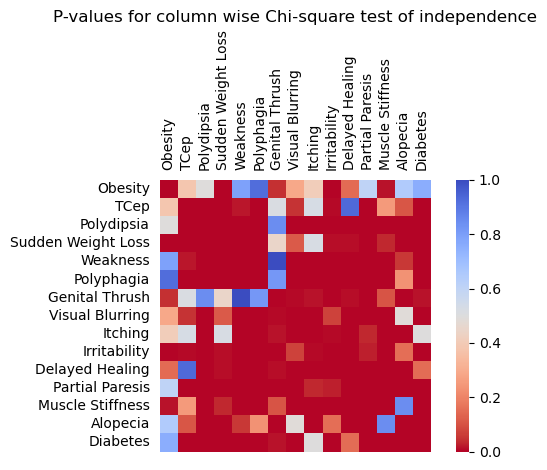

In [19]:
import matplotlib
from helpers import plot_chi_square_p_values

# reverse color as low p-value indicates strong dependence
plot_chi_square_p_values(train[binary_features + ['Diabetes']], kwargs={'cmap' : matplotlib.colormaps[cmap +'_r']})


## Data exploration

In [20]:
# There are some interesting things to see in the categoricals ...
# Only one Black in entire data set ...
# This looks very much like a rich person data set ...
for c in cat_features:
  print(train.groupby(c, dropna=False).size())

#print(train['GP'].unique())

Race
Asian        8
Black        1
MISSING      7
White      400
dtype: int64
Occupation
Architect        31
Consultant       36
Dentist          29
Economist        29
Engineer         20
Entrepreneur     22
Journalist       24
Judge            31
Lawyer           24
MISSING          10
Manager          43
Retired         116
Student           1
dtype: int64
GP
Dr. Albie Colon          27
Dr. Alice Watson         23
Dr. Andreea Gregory      21
Dr. Angharad Grainger    21
Dr. Arda O'Brien         20
Dr. Cristiano Ayala      13
Dr. Dominic Farmer       24
Dr. Ingrid Mata          20
Dr. Jamil Walters        15
Dr. Joshua Riley         26
Dr. Kameron Lancaster    23
Dr. Kason Lloyd          17
Dr. Khalid Sellers       20
Dr. Korey Clay           24
Dr. Lina Beech           16
Dr. Lorelai York         22
Dr. Madison Guy          26
Dr. Mayson Harris        19
Dr. Nial Higgs           15
Dr. Orla Arellano        18
MISSING                   6
dtype: int64


Polydipsia
0.0    1.947343
1.0    2.642298
Name: Urination, dtype: float64


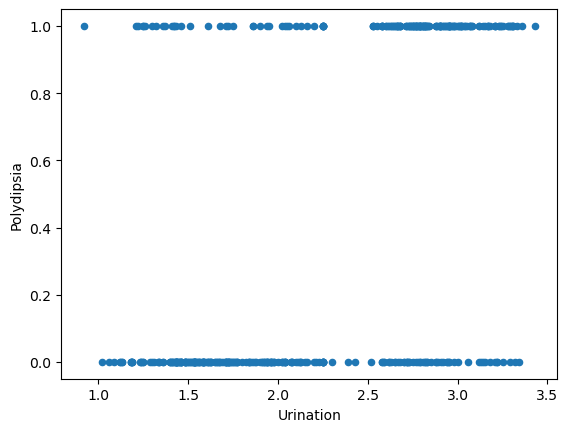

In [21]:
train.plot.scatter('Urination', 'Polydipsia')
print(train.groupby('Polydipsia')['Urination'].mean())

<Axes: ylabel='Frequency'>

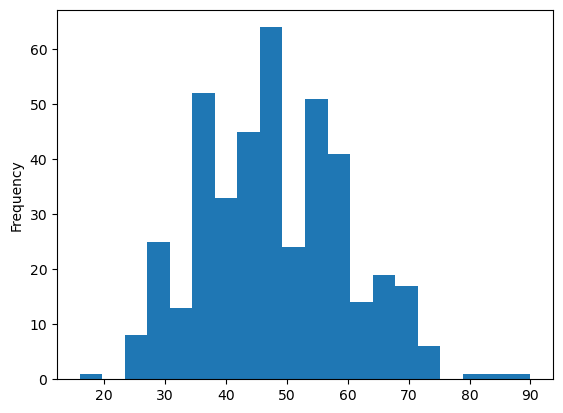

In [22]:
train['Age'].plot.hist(bins=20)

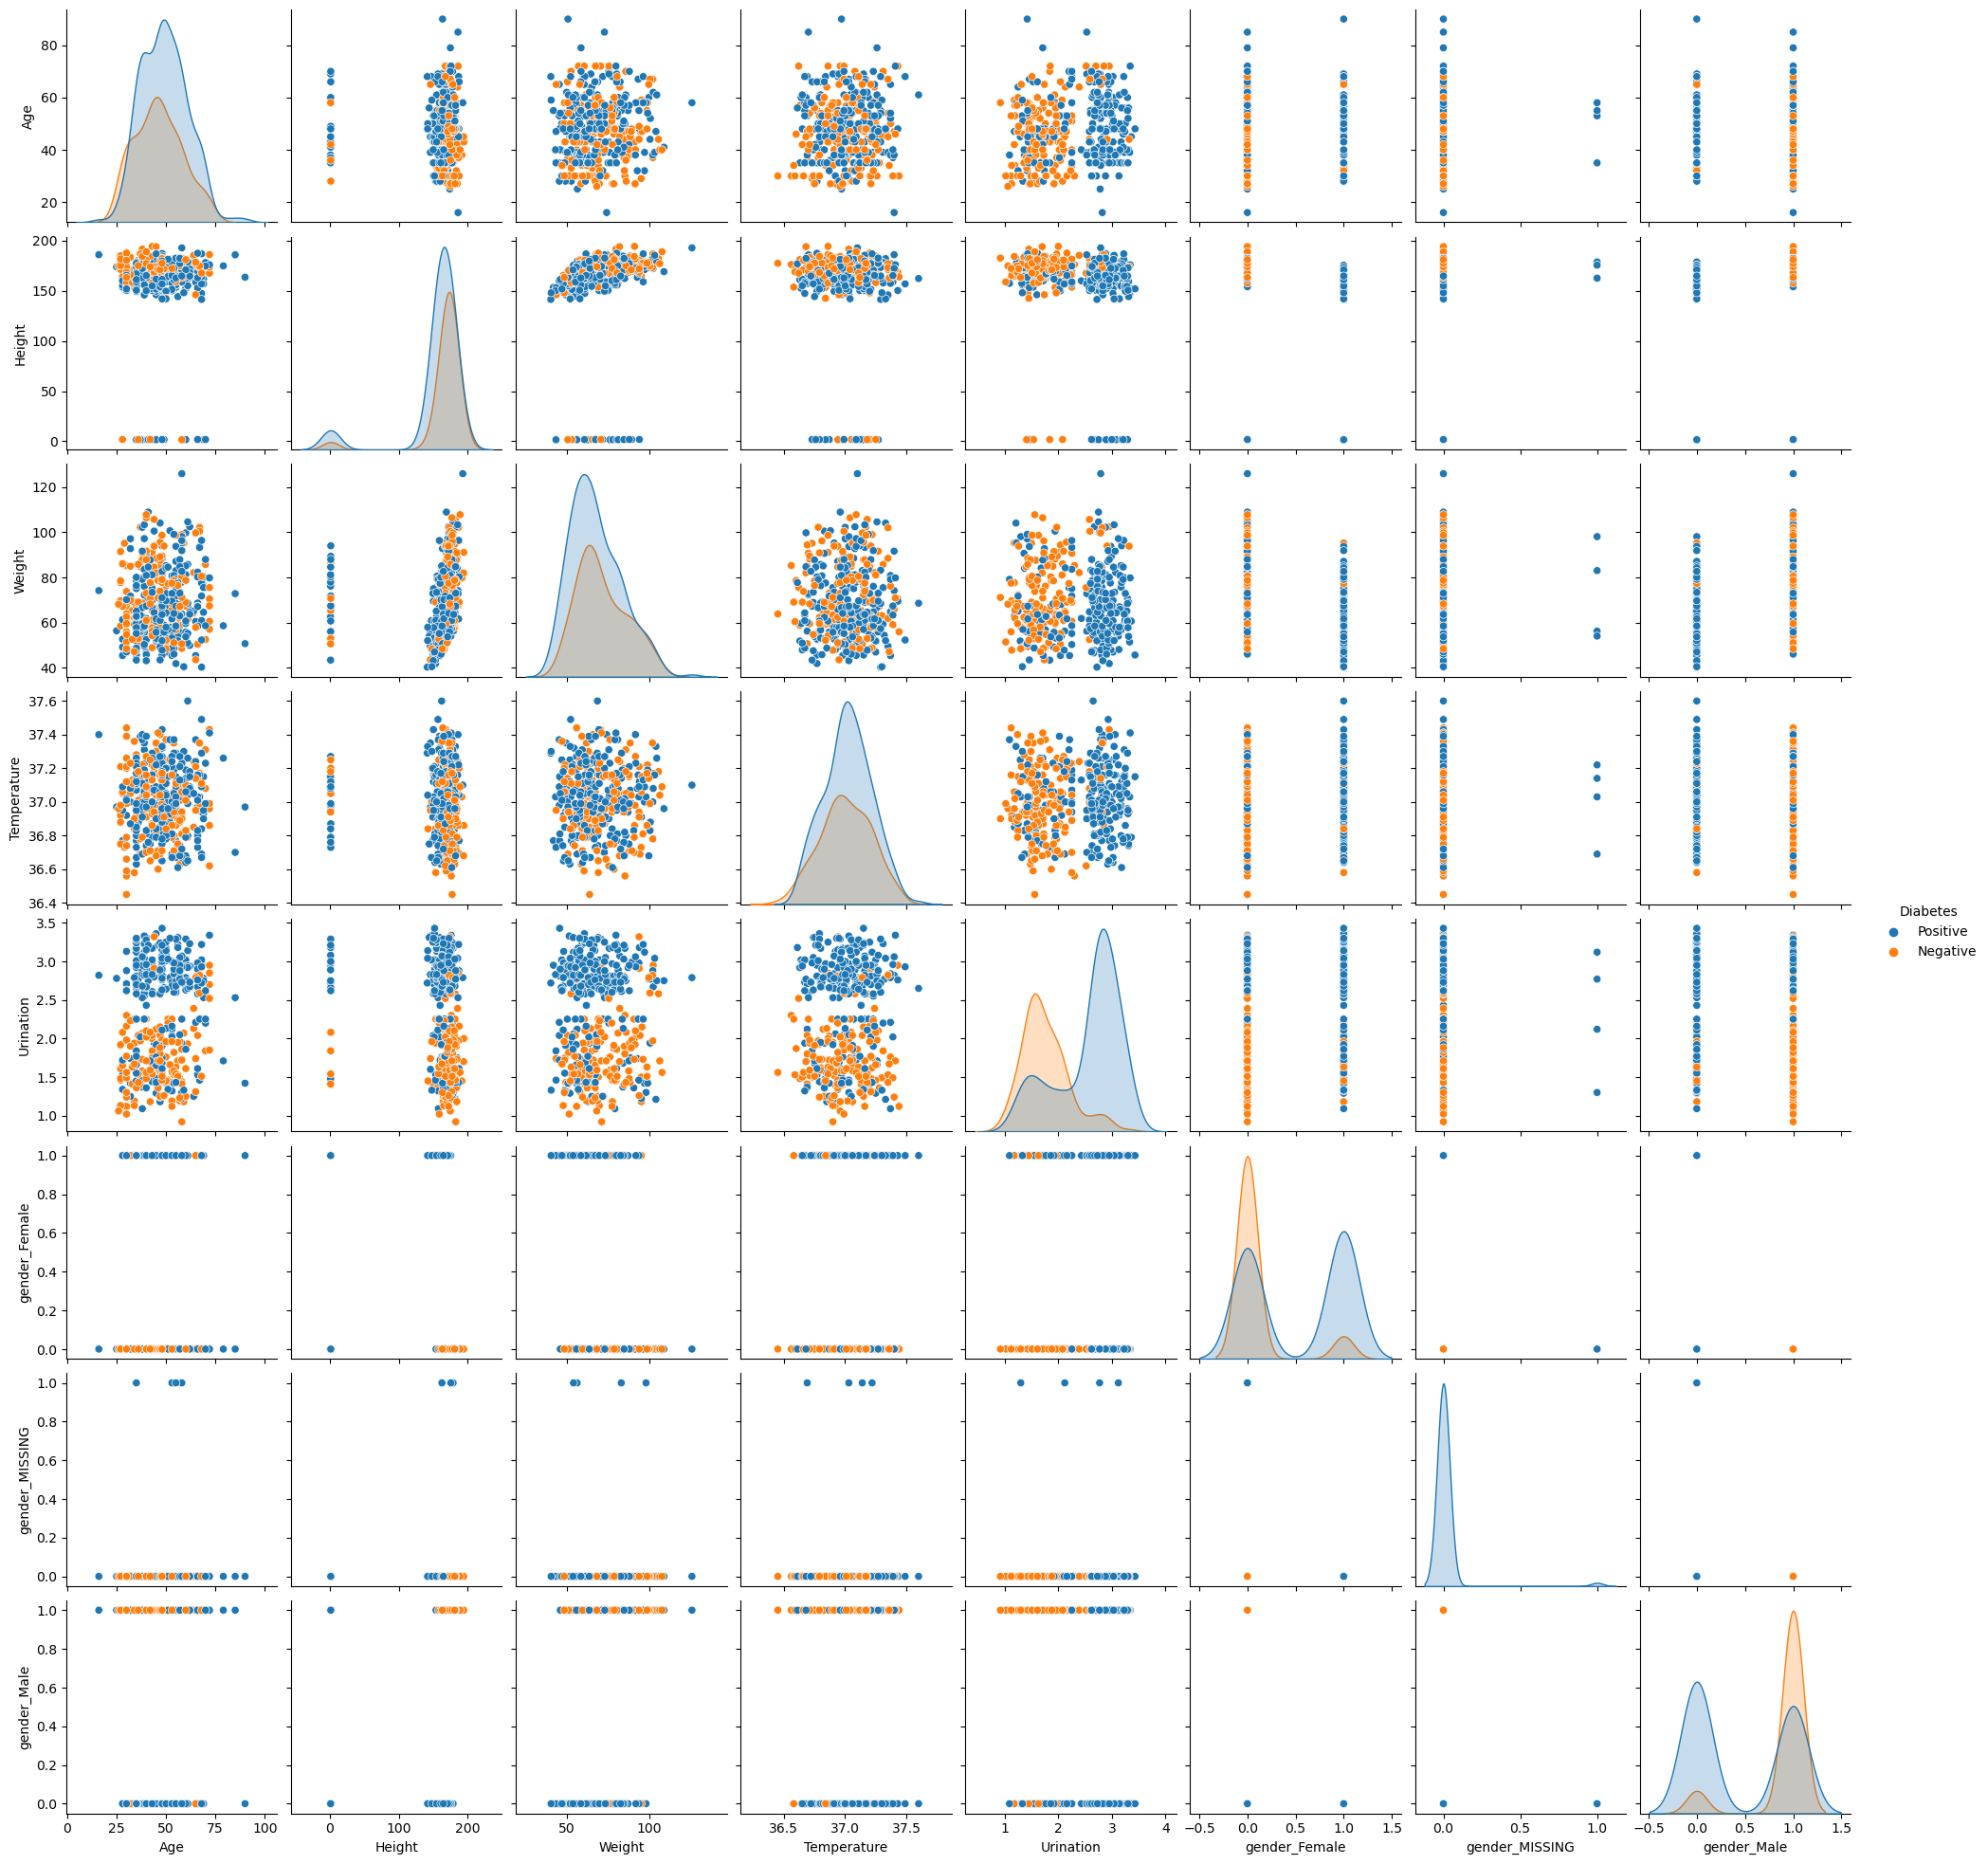

In [23]:
# After encoding, pair-plotting diabetes is messed up, because it tries to make 23*23 plots?
# need to drop the binaries from DF plotted.
train_plot = train.drop(binary_features , axis=1)

#diabetes_plot = train.drop('Gender', axis=1)
g = sns.pairplot(train_plot, hue='Diabetes')

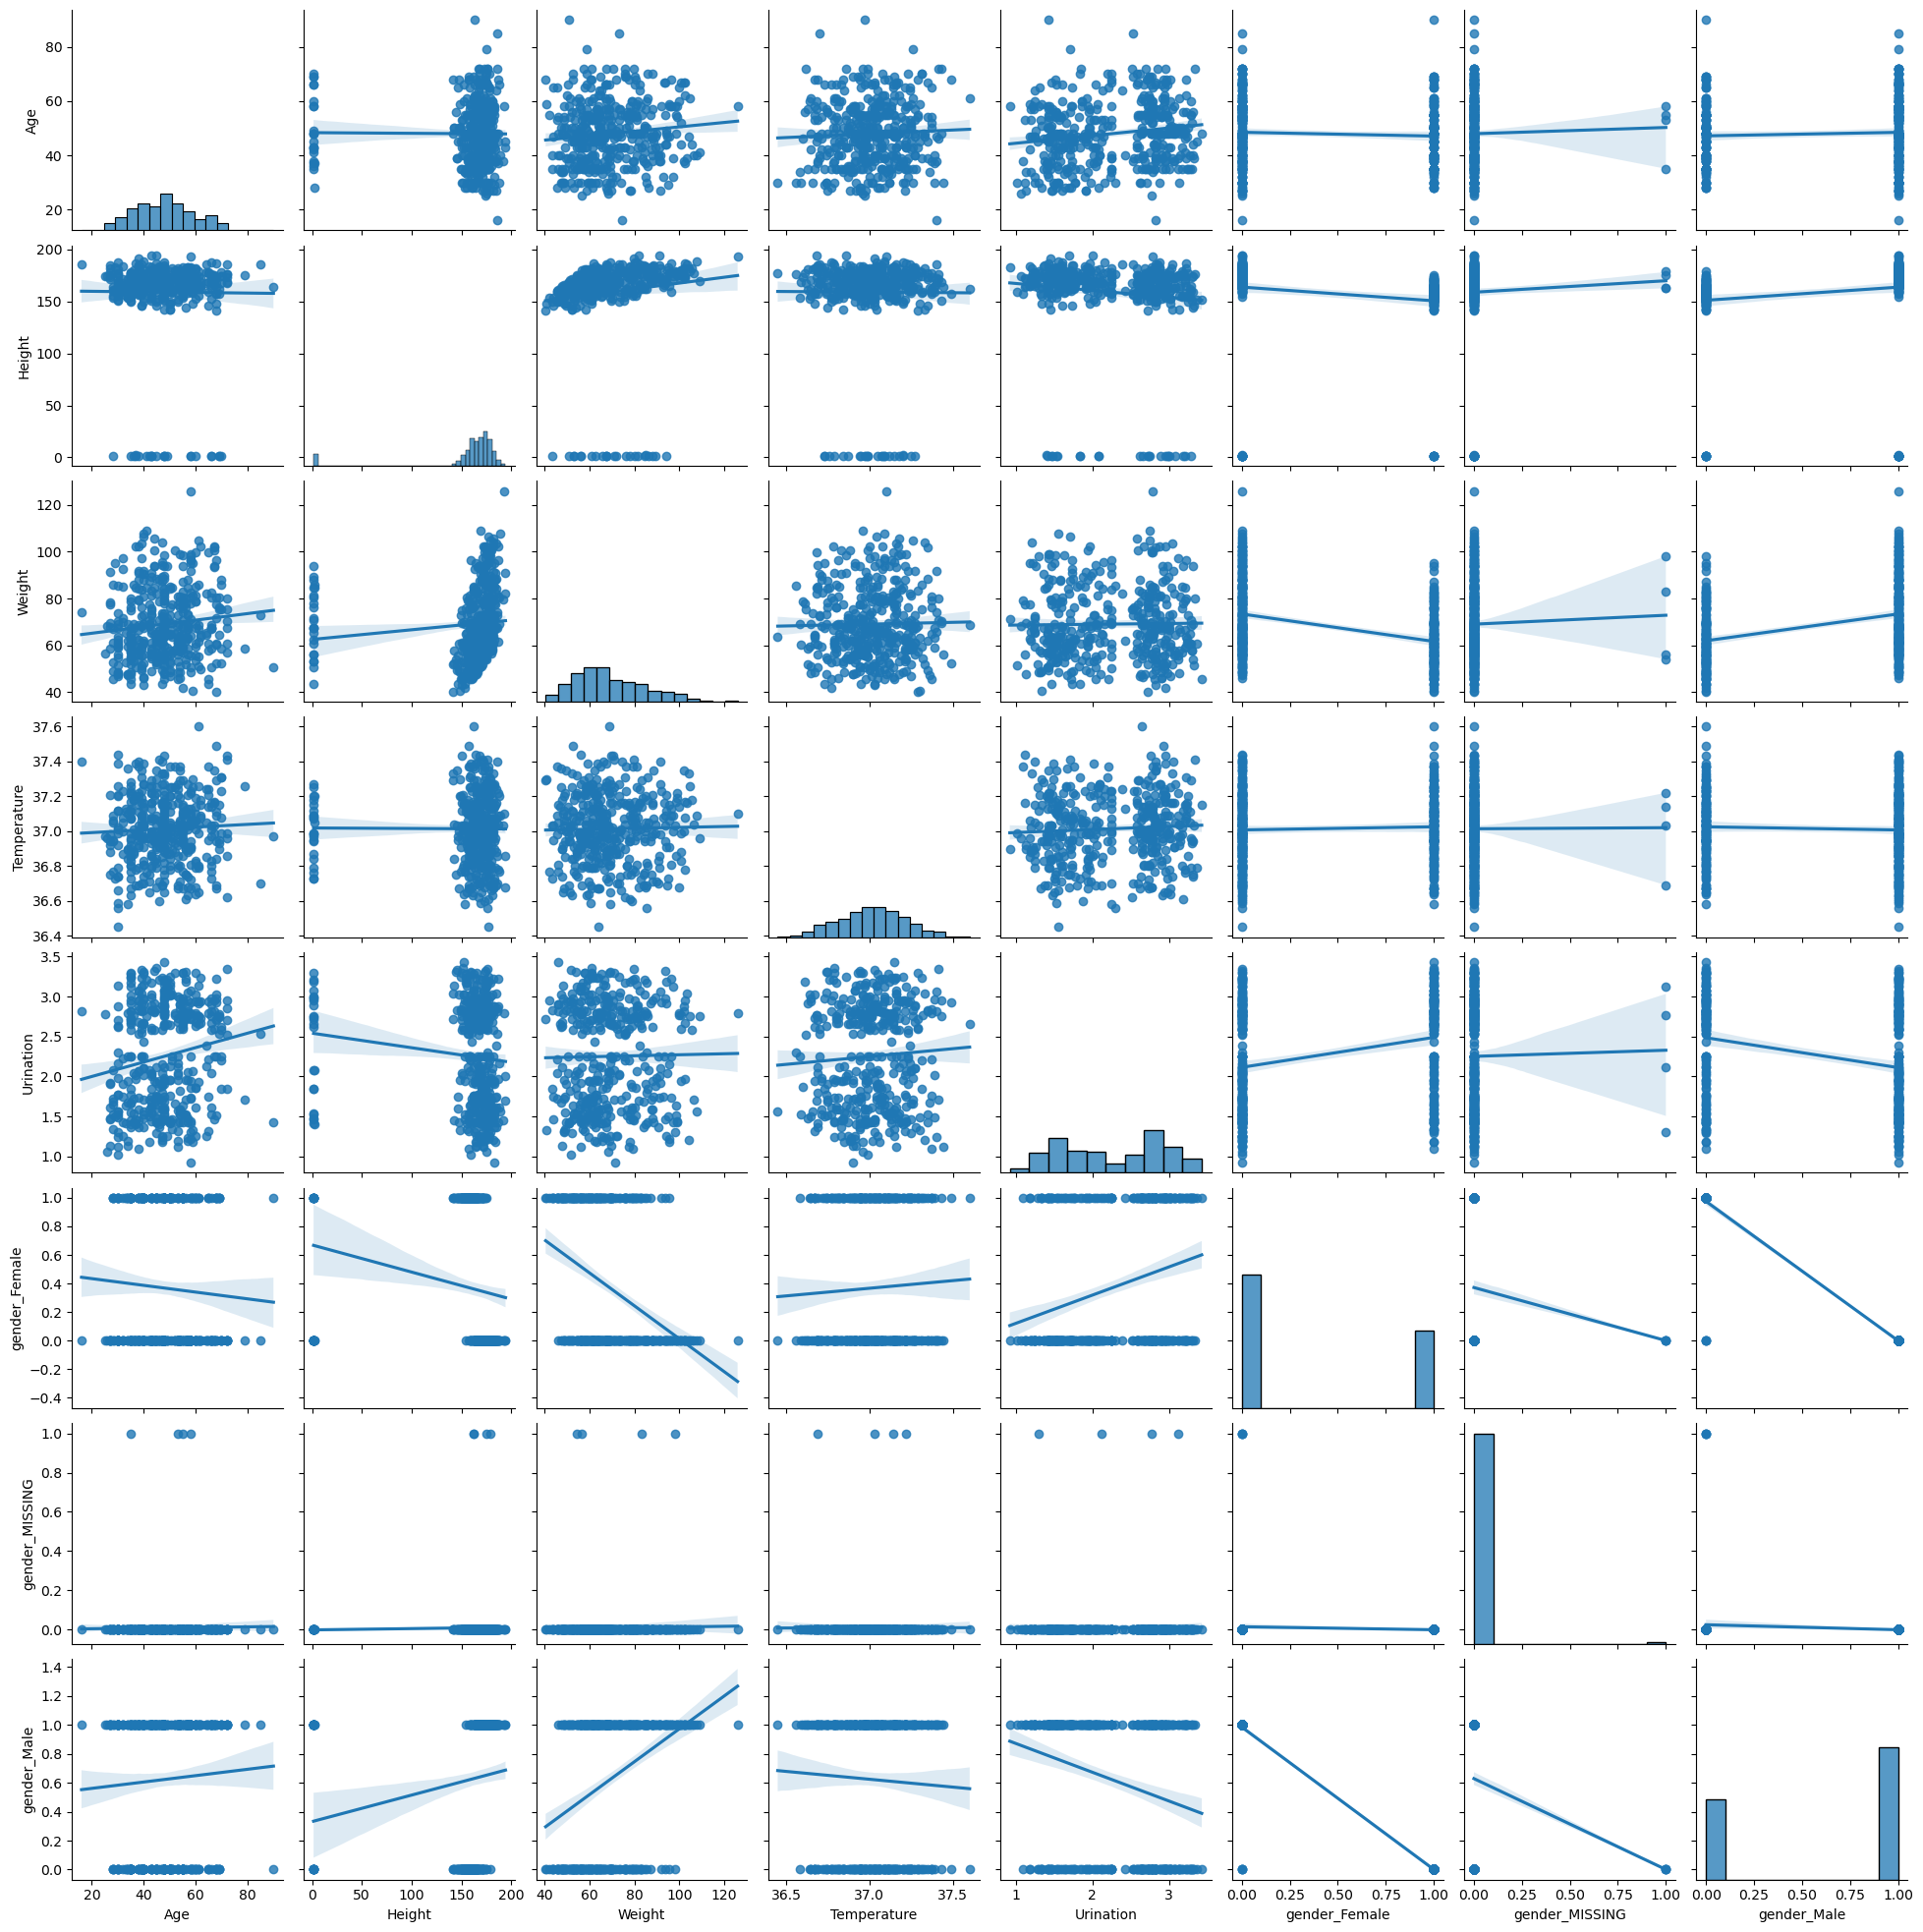

In [24]:
g = sns.pairplot(train_plot, kind='reg')

In [25]:
# Perhaps redundant given the chi-square plot earlier?
for f in binary_features:
  cross_tab = pd.crosstab(diabetes[f], diabetes['Diabetes'], rownames=[f], colnames=['Diabetes'])
  print(cross_tab)
  print('-----------------------')

Diabetes  Negative  Positive
Obesity                     
0.0            171       264
1.0             25        53
-----------------------
Diabetes  Negative  Positive
TCep                        
0               54       243
1              146        77
-----------------------
Diabetes    Negative  Positive
Polydipsia                    
0.0              190        94
1.0                8       222
-----------------------
Diabetes            Negative  Positive
Sudden Weight Loss                    
0.0                      169       127
1.0                       29       181
-----------------------
Diabetes  Negative  Positive
Weakness                    
0.0            110       100
1.0             87       218
-----------------------
Diabetes    Negative  Positive
Polyphagia                    
0.0              151       131
1.0               48       188
-----------------------
Diabetes        Negative  Positive
Genital Thrush                    
0.0                  163       236

# Training model

In [26]:
one_hot_features['Gender']

['gender_Female', 'gender_MISSING', 'gender_Male']

In [38]:
# Some sanity checks
assert train.isna().sum().sum() == 0, 'No Na-s should be present after handling. They must have been introduced'

#selected_features = ['Urination', 'Age'] + binary_features
selected_features = num_features + binary_features + one_hot_features['Gender'] 
print(selected_features)
print(len(selected_features))

# This is so stupid ... Never mind, Decision tree does not seem to care if X is series or DF ...
# Naive Bayes does, I think ...
#if len(selected_features) == 1:
#  X_train = train2[[selected_features[0]]]
#else:
X_train = train[selected_features]
y_train = train['Diabetes']

for index in X_train.dtypes.keys():
    dtype = X_train.dtypes[index]
    print(index, dtype)
    # Quite ugly and not very felxible test. Should be improved upon
    assert dtype == 'float64' or dtype == 'int64' or dtype == 'uint8', f"feature '{index}' is not of type float or int but {dtype}"


['Age', 'Height', 'Weight', 'Temperature', 'Urination', 'Obesity', 'TCep', 'Polydipsia', 'Sudden Weight Loss', 'Weakness', 'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'gender_Female', 'gender_MISSING', 'gender_Male']
22
Age float64
Height float64
Weight float64
Temperature float64
Urination float64
Obesity float64
TCep int64
Polydipsia float64
Sudden Weight Loss float64
Weakness float64
Polyphagia float64
Genital Thrush float64
Visual Blurring float64
Itching float64
Irritability float64
Delayed Healing float64
Partial Paresis float64
Muscle Stiffness float64
Alopecia float64
gender_Female uint8
gender_MISSING uint8
gender_Male uint8


Age : 15.93459237585644
Height : 81.7122051496722
Weight : 20.65099762375078
Temperature : 0.0009042873768646765
Urination : 28.258164177892823
Obesity : 0.17226562499999998
TCep : 55.827222222222204
Polydipsia : 92.1375
Sudden Weight Loss : 43.00838323353294
Weakness : 9.557067510548517
Polyphagia : 27.969613259668503
Genital Thrush : 5.268817204301076
Visual Blurring : 17.226344086021506
Itching : 0.30487804878048813
Irritability : 31.862250000000003
Delayed Healing : 1.263015463917525
Partial Paresis : 49.0563202247191
Muscle Stiffness : 7.238006756756757
Alopecia : 20.506617647058818
gender_Female : 50.69428104575162
gender_MISSING : 2.5
gender_Male : 32.13600386100385


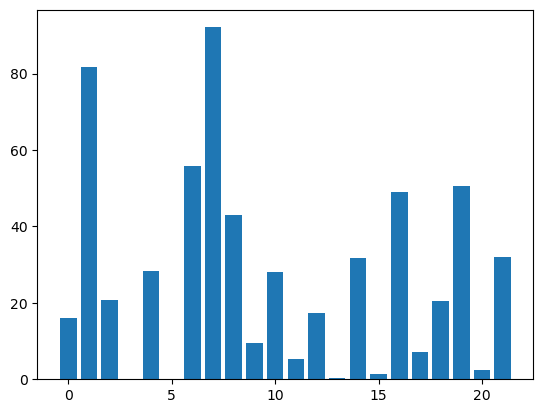

,Age,Height,Weight,Urination,TCep,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Visual Blurring,Irritability,Partial Paresis,Alopecia,gender_Female,gender_Male
454,40.000000,159.93,61.92,2.43,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
103,29.000000,182.46,95.15,1.50,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
290,48.000000,159.30,54.45,2.77,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0
447,47.962871,174.01,54.34,2.81,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
22,47.000000,182.01,104.09,1.21,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,57.000000,182.29,84.80,2.77,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0,1
30,48.000000,179.58,63.65,1.61,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,1
360,47.962871,177.35,98.69,1.51,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
311,58.000000,164.69,82.74,2.73,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0


In [39]:
from sklearn.feature_selection import SelectKBest, chi2
skb =  SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_train, y_train)

cols_idxs = skb.get_support(indices=True)
features_df_new = X_train.iloc[:,cols_idxs]



# what are scores for the features
for i in range(len(skb.scores_)):
 print(X_train.columns[i], ":", skb.scores_[i])
# plot the scores
plt.bar([i for i in range(len(skb.scores_))], skb.scores_)
plt.show()
features_df_new

Decision tree with depth=1. cv score: 0.7549053356282271
Decision tree with depth=2. cv score: 0.795754446356856
Decision tree with depth=3. cv score: 0.8654044750430293
Decision tree with depth=4. cv score: 0.8798909925415949
Decision tree with depth=5. cv score: 0.9039013195639702
Decision tree with depth=6. cv score: 0.9037865748709123
Decision tree with depth=7. cv score: 0.9014343086632243
Decision tree with depth=8. cv score: 0.8917670682730924
Decision tree with depth=9. cv score: 0.9014343086632243
Decision tree with depth=10. cv score: 0.8893574297188754
Decision tree with depth=11. cv score: 0.9014056224899598
Decision tree with depth=12. cv score: 0.8918244406196214
Decision tree with depth=13. cv score: 0.8870051635111876
Decision tree with depth=14. cv score: 0.8966150315547907
Decision tree with depth=15. cv score: 0.9038439472174412
Decision tree with depth=16. cv score: 0.8942340791738381
Decision tree with depth=17. cv score: 0.9037865748709123
Decision tree with depth

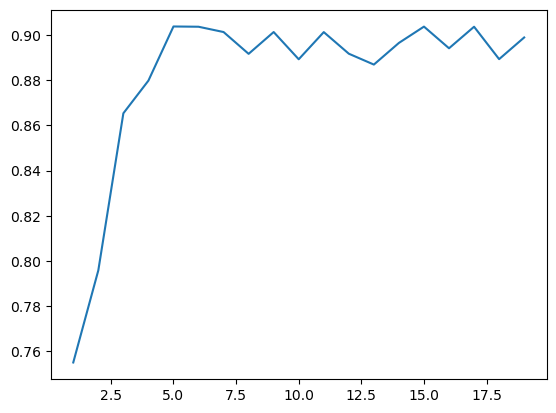

In [40]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

depths = list(range(1, 20))

scores = {}

"""
By weighing misslcassification more severly, we can minimze type II error,
which is desirable in the public health scenario. However, even with
a very skewed weighing (1-100), we still get missclassification,
indicatting that there are 'outliers' in the test set.

Further investigation revealed that they typically where quite old or quite young,
with a typical amount of urination.
"""
weight = {0: 1,
          1:1}

use_weights = False

for d in depths:
    clf_cv = tree.DecisionTreeClassifier(max_depth=d, class_weight=weight if use_weights else None)
    score = cross_val_score(clf_cv, X_train, y_train, cv=5).mean()
    scores[d] = score
    print(f'Decision tree with depth={d}. cv score: {score}')

print(scores.values())

plt.plot(scores.keys(), scores.values())

clf = tree.DecisionTreeClassifier(max_depth=7, class_weight=weight if use_weights else None)
clf = clf.fit(X_train, y_train)

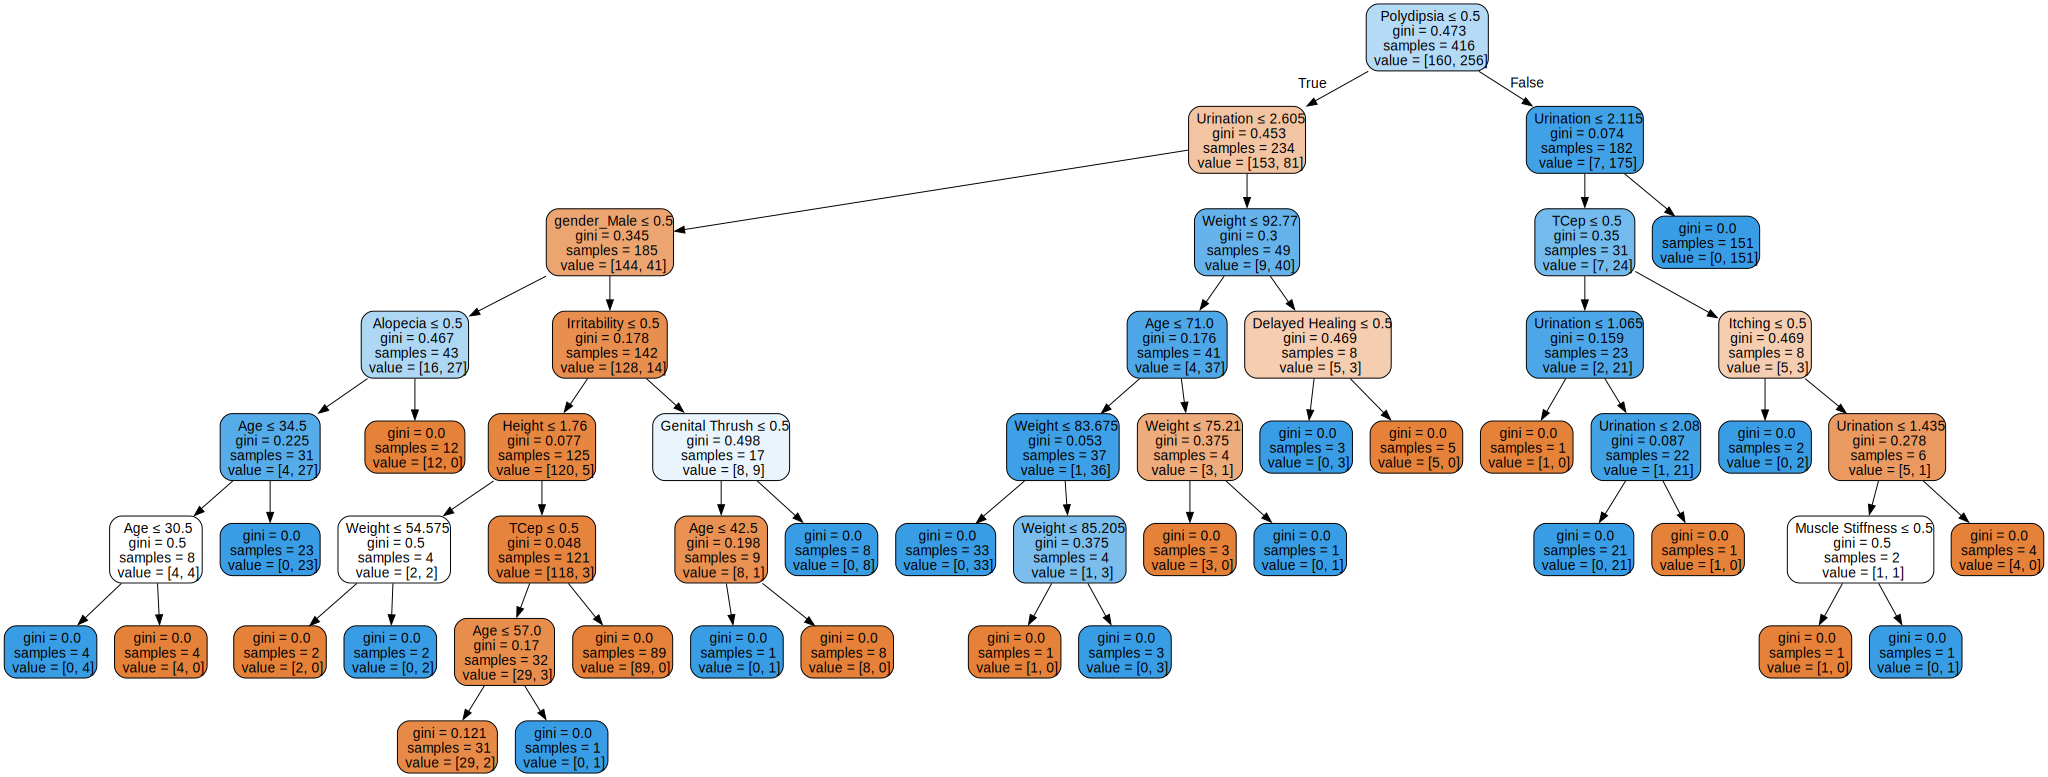

In [41]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=selected_features,
                      #class_names='Diabetes', # this parameter doesen't seem to work
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
# Make Pdf
#graph.render("Diabetes")
graph